In [163]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [164]:
image = ""
#width, height = image.shape

# predicted_lines = model(image)


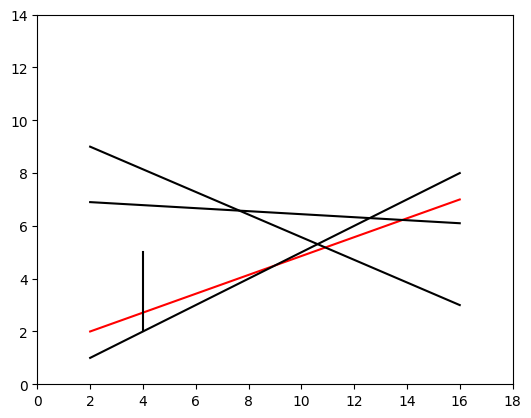

In [165]:
# Example to compute something
 
# Predictions
predicted_lines = [[[2, 1],[16,8]],
      [[2, 9],[16,3]],
      [[2, 6.9],[16,6.1]],
      [[4, 2],[4, 5]],
 ]

# Ground truth
width, height = 18, 14
gt = [[[2, 2],[16,7]],
    #   [[2, 8],[16,2]],
    #   [[2, 7],[16,6]],
 ]

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
for i, rect in enumerate(gt):
    (point1, point2) = rect
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], 'r-')  # line in black
    # ax.text(point1[0], point1[1], str(i), color='blue')  # index in blue

for i, rect in enumerate(predicted_lines):
    (point1, point2) = rect
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k-')  # line in black
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal')
plt.show()

In [166]:
# We compute the scope and bias of each rect
def scope_and_bias(rect):
    [x1,y1],[x2,y2] = rect    
    if x2-x1 == 0:
        bias, slope = 99999, 99999
    else:    
        slope = (y2 - y1) / (x2 - x1)
        bias = y1 - slope * x1
    return slope, bias, x1, x2

# We create the lines that delimit margins of each line
limit = []
margin = 1
for rect in gt:
    # print(rect)
    m, b, x1, x2 = scope_and_bias(rect)
    if m == 99999:
        limit.append([m,b,99999,99999,x1,x2])
    else:
        b1 = margin / np.cos(m) + b
        b2 = - margin / np.cos(m) + b
        limit.append([m,b,b1,b2,x1,x2])

gt_image = np.array(np.zeros((height+1, width+1), dtype=np.uint8))
predict_image = np.array(np.zeros((height+1, width+1), dtype=np.uint8))
gt_limits_image = (np.zeros((height+1, width+1), dtype=np.uint8))

for [m,b,b1,b2,x1,x2] in limit:
    for x in range(int(x1),int(x2+1)):
        if m != 99999:
            #for gt
            y_gt = round(m*x+b)
            gt_image[height-y_gt-1,x] = 1

            #for limits
            y1 = m*x + b1
            y2 = m*x + b2
            for y in range(round(min(y1,y2)), round(max(y1,y2))+1):
                if 0 <= y < height+1:
                    gt_limits_image[height-y-1,x] = 1
        else:
            for y in range(0, height+1):
                #for gt
                gt_image[height-y-1,x] = 1

                #for limits
                for x_limit in range(round(x-margin), round=x+margin):
                    gt_limits_image[height-y-1,x_limit] = 1

for line in predicted_lines:
    m, b, x1, x2 = scope_and_bias(line)
    if m != 99999:
        for x in range(int(x1),int(x2+1)):
            y = round(m*x+b)
            predict_image[height-y-1,x] = 1
    else:
        for y in range(0, height+1):
            predict_image[height-y-1,x1] = 1

intersection = np.logical_and(gt_limits_image, predict_image).sum()
union = np.logical_or(gt_image, predict_image).sum()

if union == 0:
    iou = 0.0  # To handle the case when both images are empty
else:
    iou = intersection / union
    # if iou >1:    # Not necessary
    #     return 1

print("IoU:", iou)

IoU: 0.4444444444444444


Visualize results

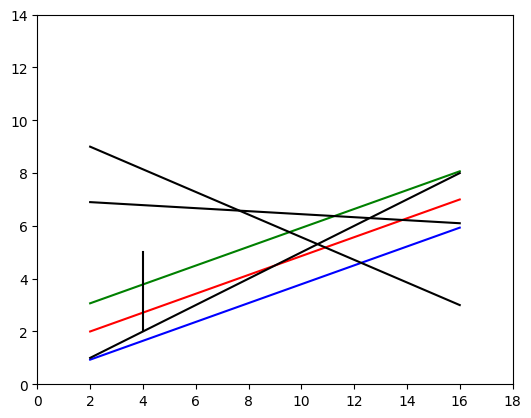

gt_limits_image [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
predicted_lines [[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 

In [167]:
#visualize limit
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
for i, rect in enumerate(limit):
    [m,b,b1,b2,x1,x2] = rect
    ax.plot([x1, x2], [(b1+m*x1), (b1+m*x2)], 'g-')  # line in black
    ax.plot([x1, x2], [(b2+m*x1), (b2+m*x2)], 'b-')  # line in black

for i, rect in enumerate(gt):
    (point1, point2) = rect
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], 'r-')  # line in black
    
for i, rect in enumerate(predicted_lines):
    (point1, point2) = rect
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k-')  # line in black
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_aspect('equal')
plt.show()

print("gt_limits_image",gt_limits_image)
print("predicted_lines",predict_image)
print("gt_image",gt_image)
